In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/temp_forecast.csv")
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
pd.set_option('display.max_column',None)

In [6]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## EDA

In [7]:
tds=data.copy()

In [8]:
tds.shape

(7752, 25)

Dataset has 7752 rows and 25 columns.

In [9]:
tds.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [10]:
tds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Every column is float type except date, we will handle this.

In [11]:
tds.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Most of the columns have null values. We have to hadle it.
There are two column station and date have only 2 null value , so we can drop it.
Remaining columns have more null values so we have to be careful while imputing.

In [12]:
tds.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [13]:
# converting date column into date time format.

tds['Date']=pd.to_datetime(tds['Date'])

In [14]:
# extracting day, month and year from date column.

tds['Year']=tds['Date'].dt.year
tds['Month']=tds['Date'].dt.month
tds['Day']=tds['Date'].dt.day

In [15]:
tds.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [16]:
# droping original date column after extraction.
tds.drop('Date',axis=1,inplace=True)

In [17]:
tds.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Year                float64
Month               float64
Day                 float64
dtype: object

In [18]:
tds.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000000,7.080645,16.370968
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,1.414305,2.238364,8.241331
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


As we can see that LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 these columns are having min, 25% and 50% as 0.
And difference between its 75% and max value is very large.
these columns also have null values, if we fill that with its median then those values are also going to be 0, because its median is 0. it does not make sense, if we go with the flow it will be baised with 0 value.
We should drop these columns,or do something else lets handle it later.

### Univariate Analysis

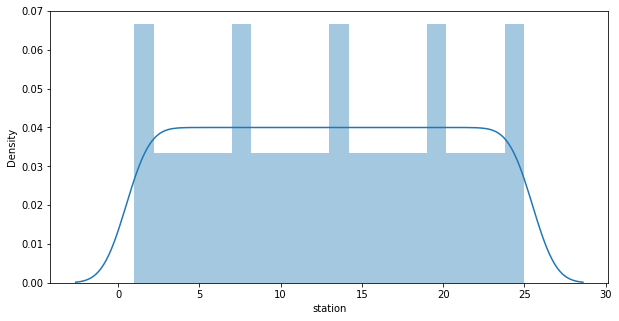

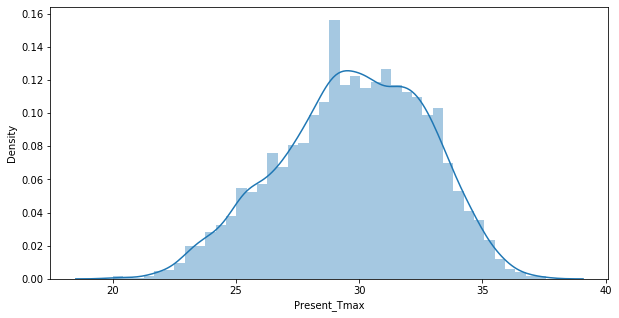

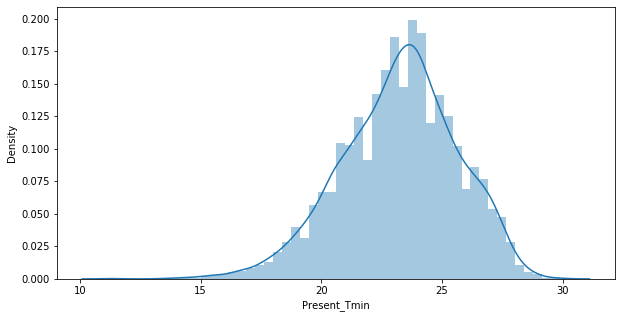

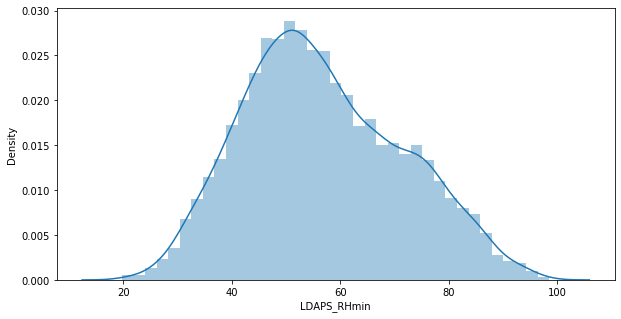

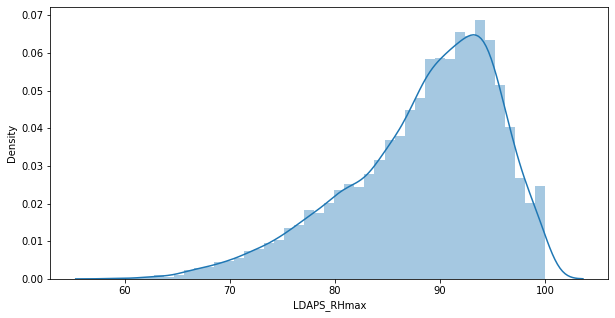

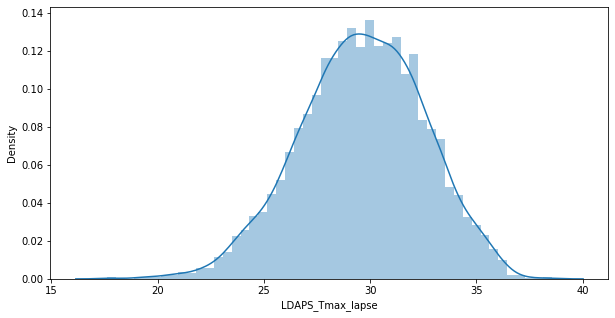

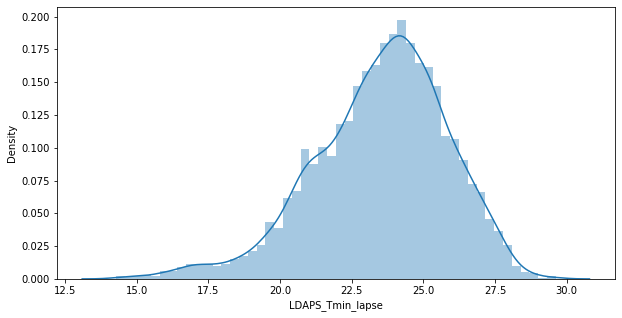

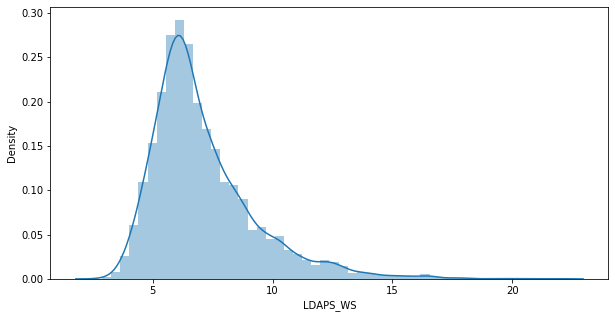

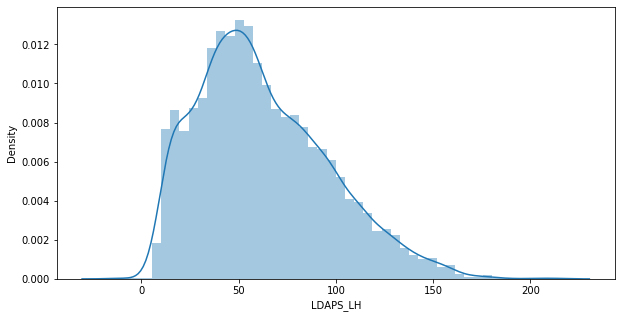

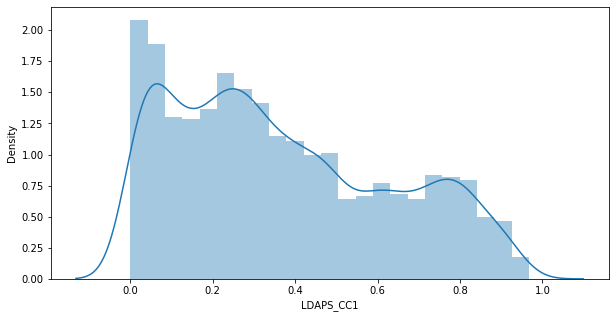

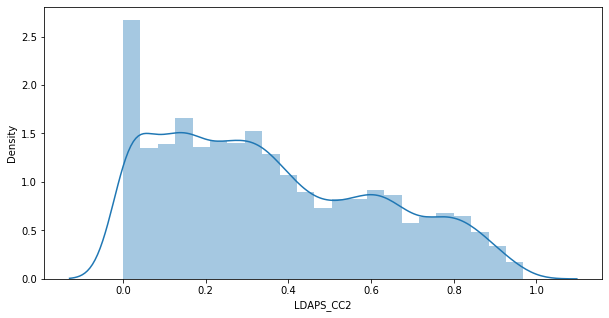

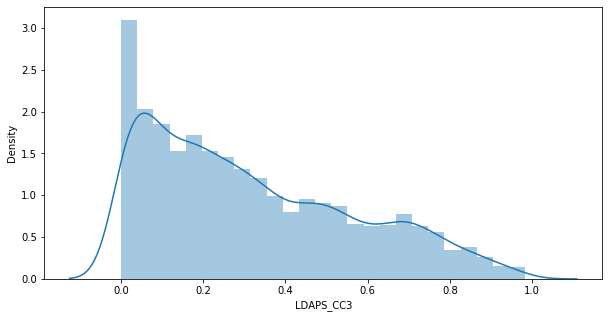

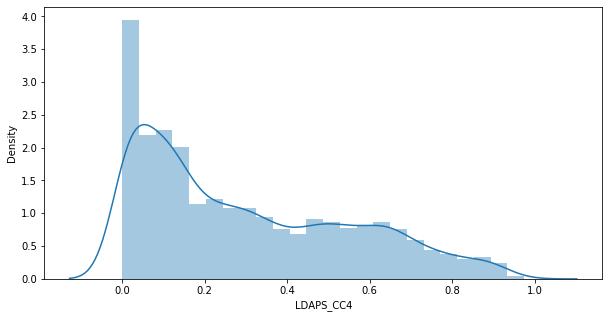

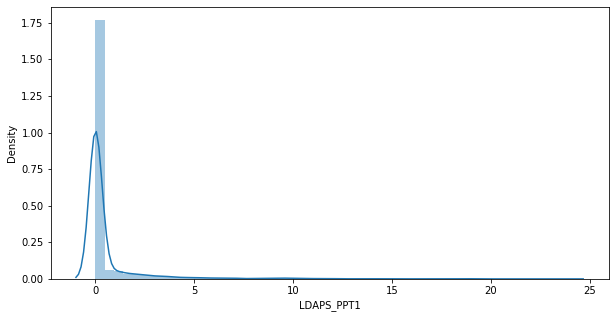

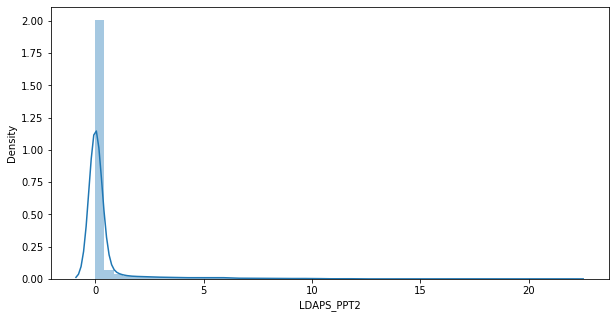

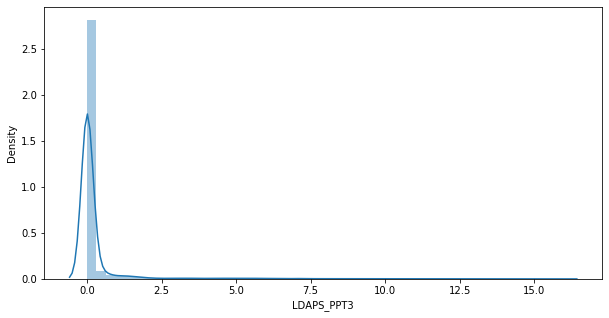

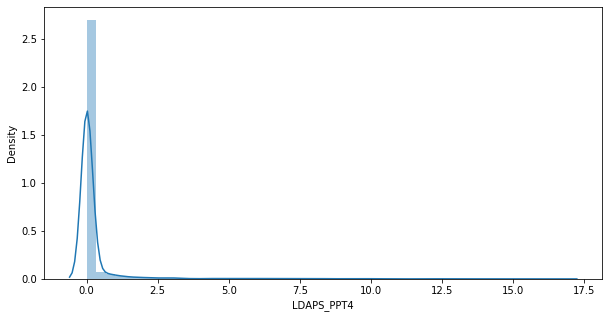

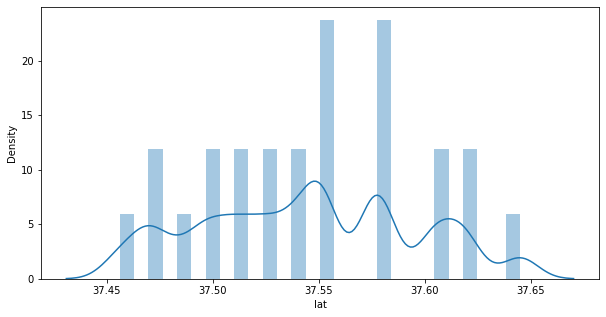

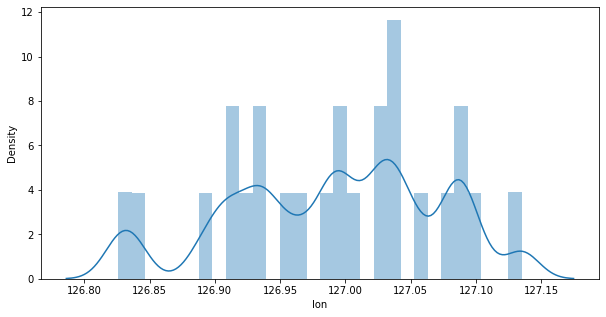

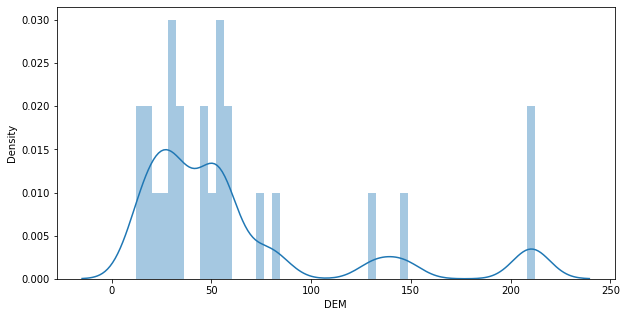

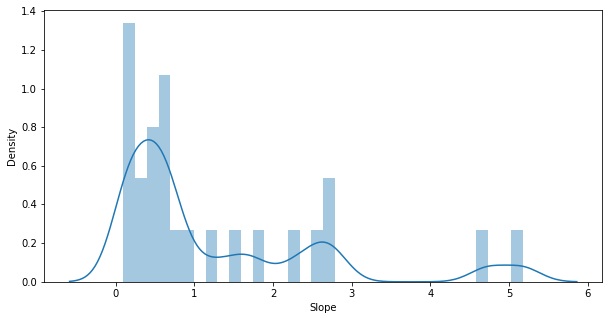

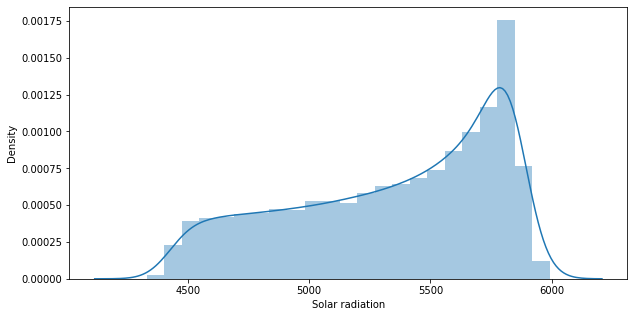

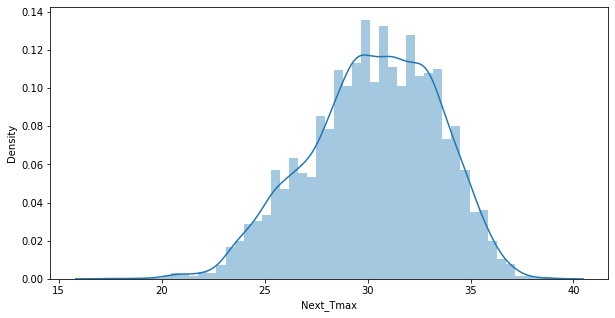

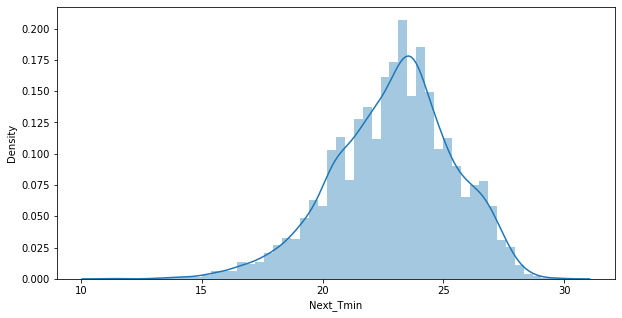

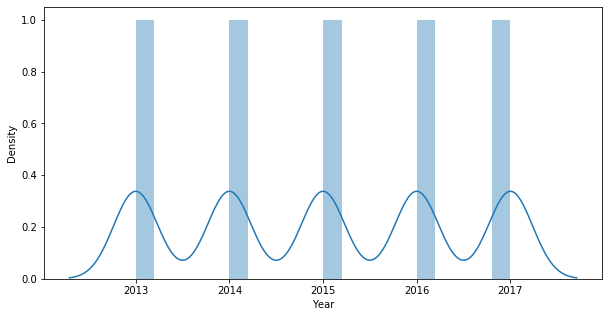

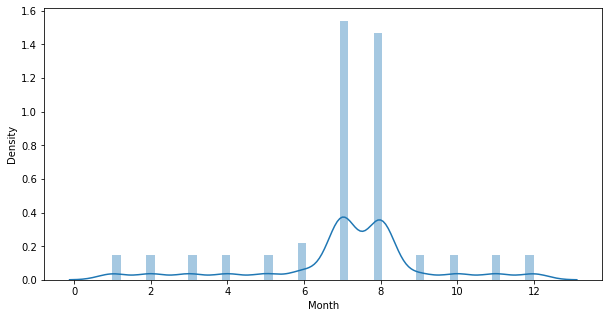

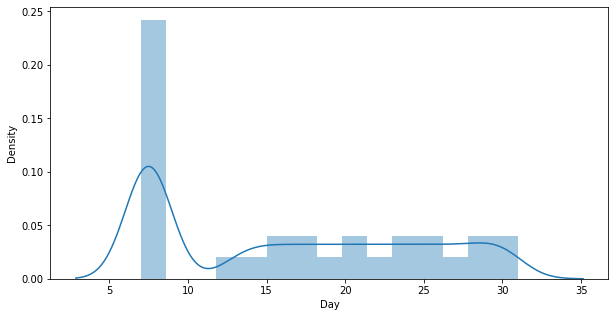

In [19]:
for i in tds.columns:
    plt.figure(figsize=(10,5))
    sns.distplot(tds[i])
    plt.show()       

Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Next_Tmax and Next_Tmin these columns are quite normally distributed so we fill its null value by its mean value.

LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4 these columns are not normally distributed. So,their null value is filled with its median value.

### Bivariate Analysis

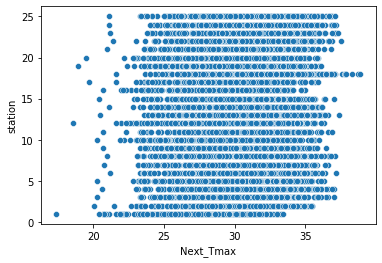

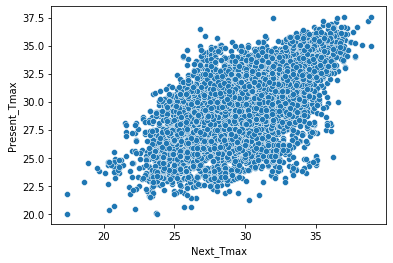

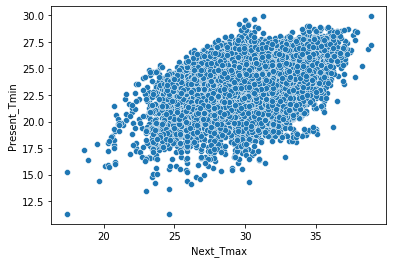

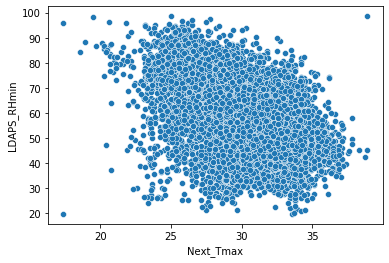

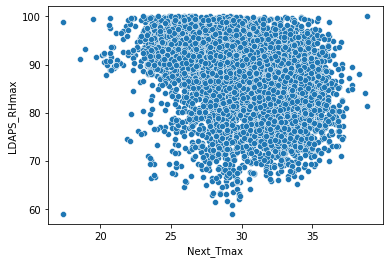

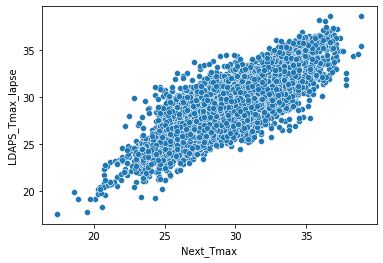

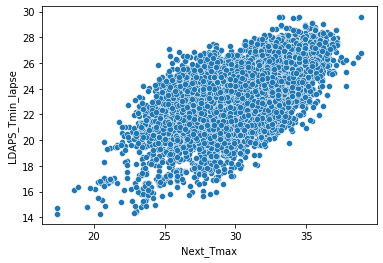

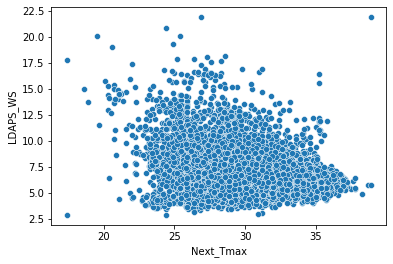

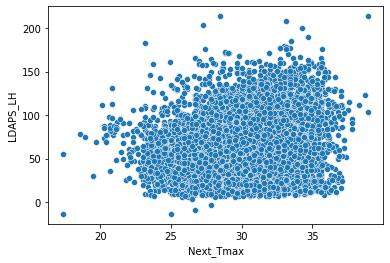

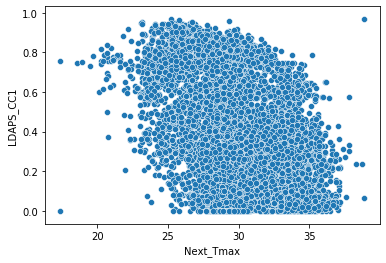

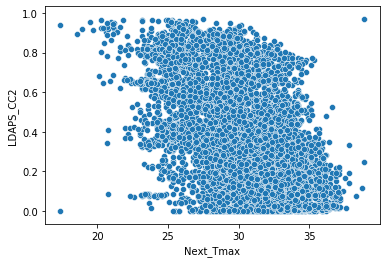

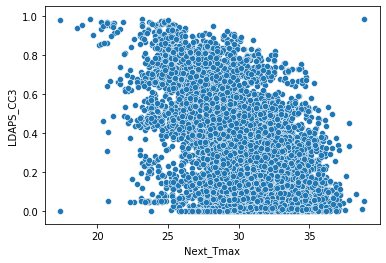

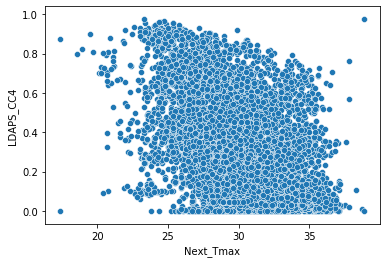

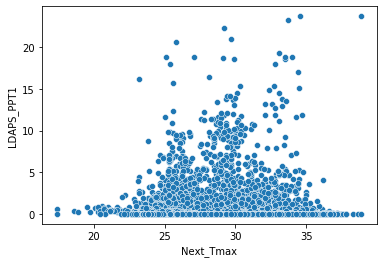

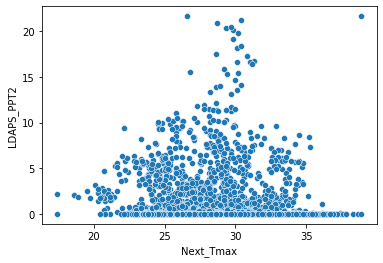

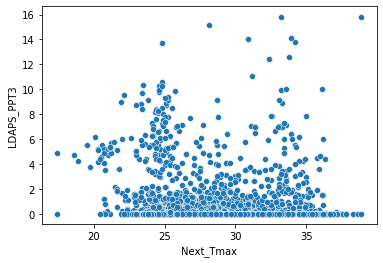

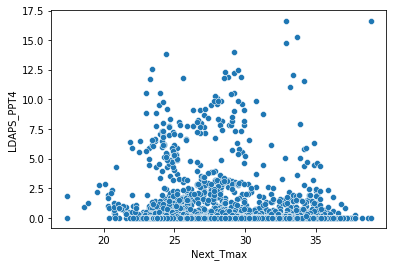

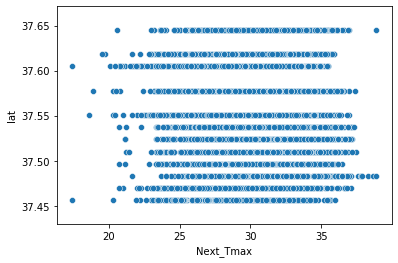

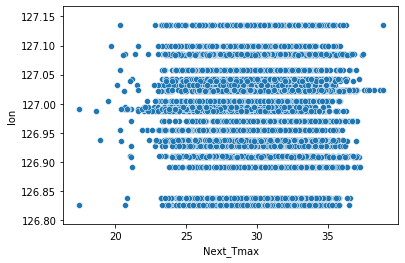

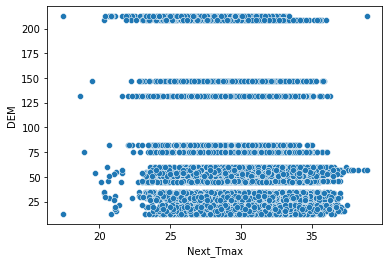

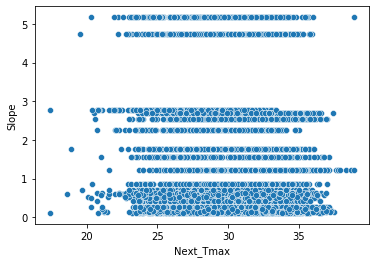

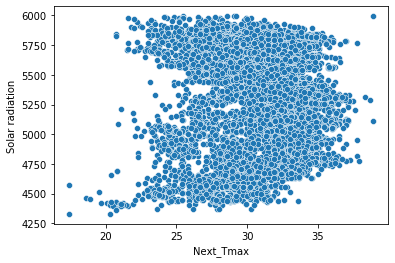

In [20]:
# scatterplot between Next_Tmax and other columns:

for i in tds.iloc[:,0:-5].columns:
    sns.scatterplot(x=tds['Next_Tmax'],y=tds[i])
    plt.show()

Next_Tmax and present_Tmax are in positively related to each other.Maximun density of temperature is between 25 to 35.
Next_Tmax and present_Tmin are also quite positively related to each other.
Next_Tmax and LDAPS_RHmin are quite negatively related.
Next_Tmax and LDAPS_Tmax_lapse are linearly related.
From all above plots we can analyse that whatever the relation between columns but they have maximun density between 25 to 35.

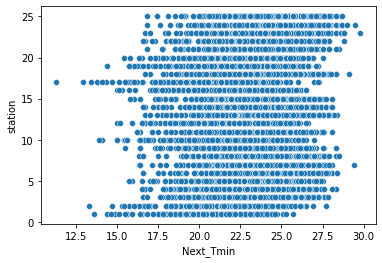

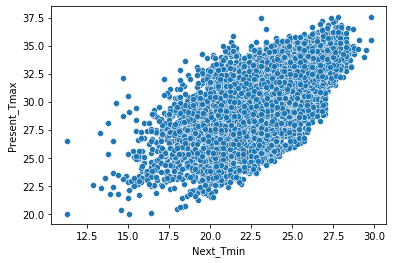

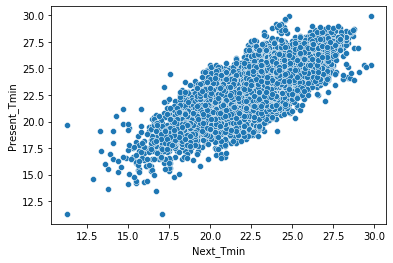

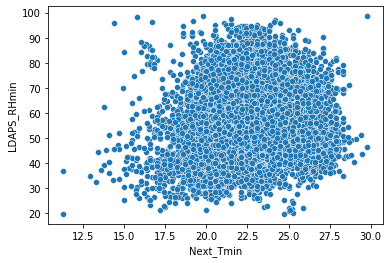

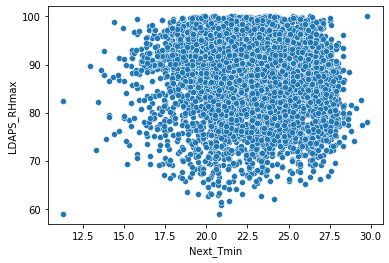

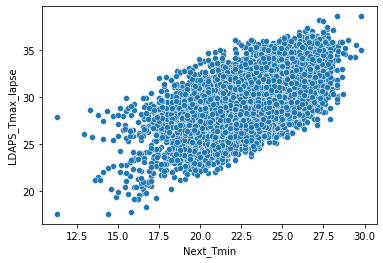

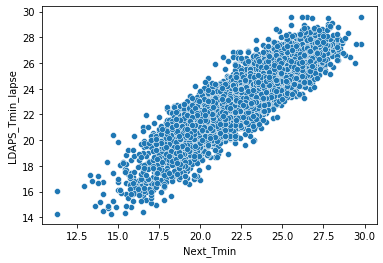

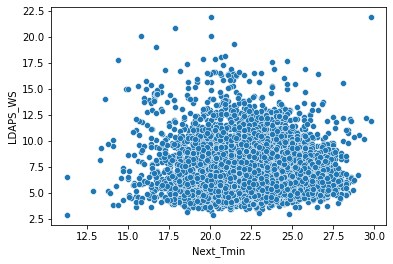

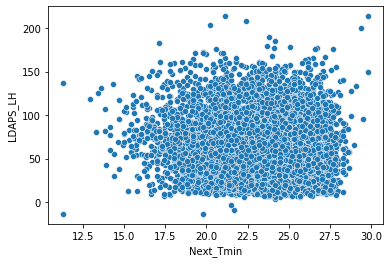

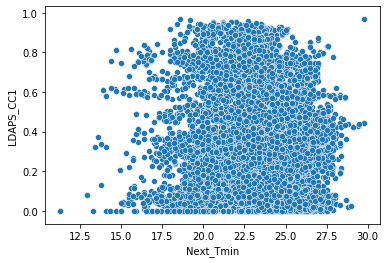

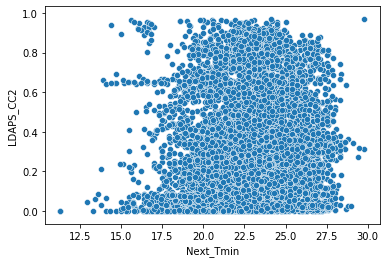

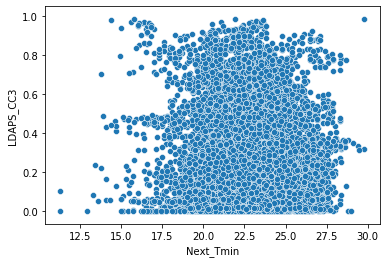

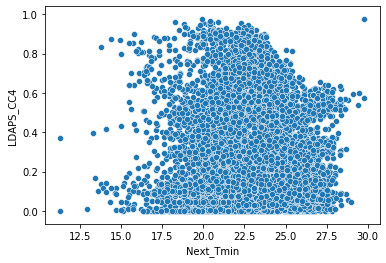

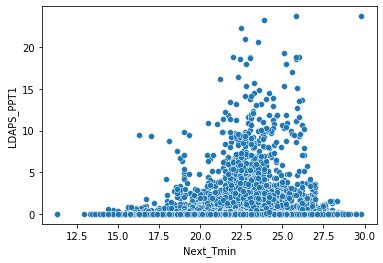

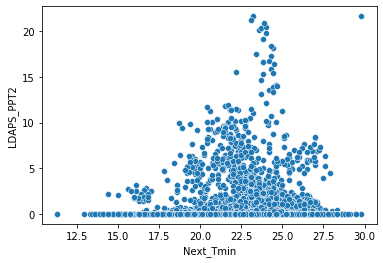

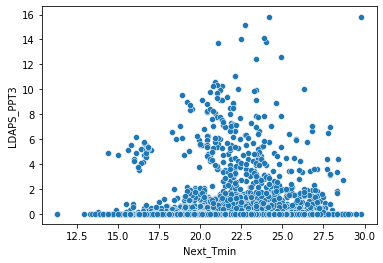

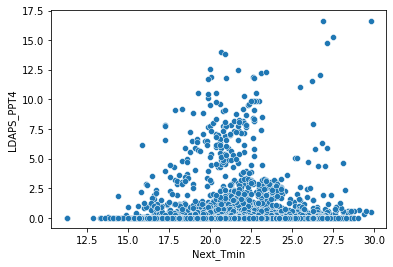

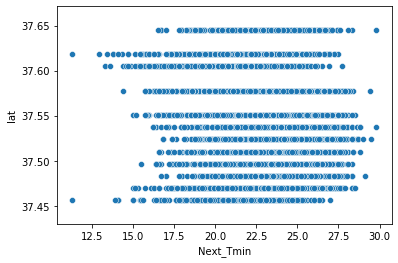

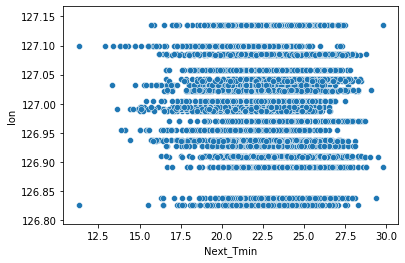

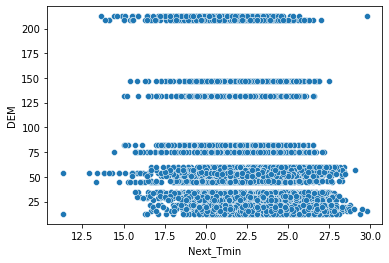

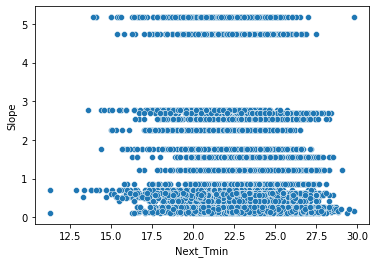

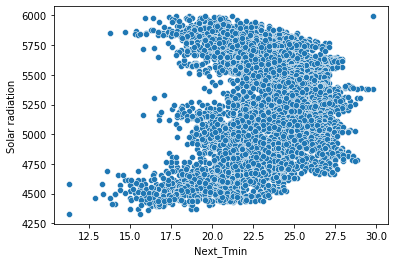

In [21]:
# scatterplot between Next_Tmin and other columns:

for i in tds.iloc[:,0:-5].columns:
    sns.scatterplot(x=tds['Next_Tmin'],y=tds[i])
    plt.show()

From all above given graph it is quite clear that every factor plays and important role to analyse next temperature min or max both.
on some point factors are behaving like constant but we can see the flactuation in next temperature.

### Multivariate Analysis

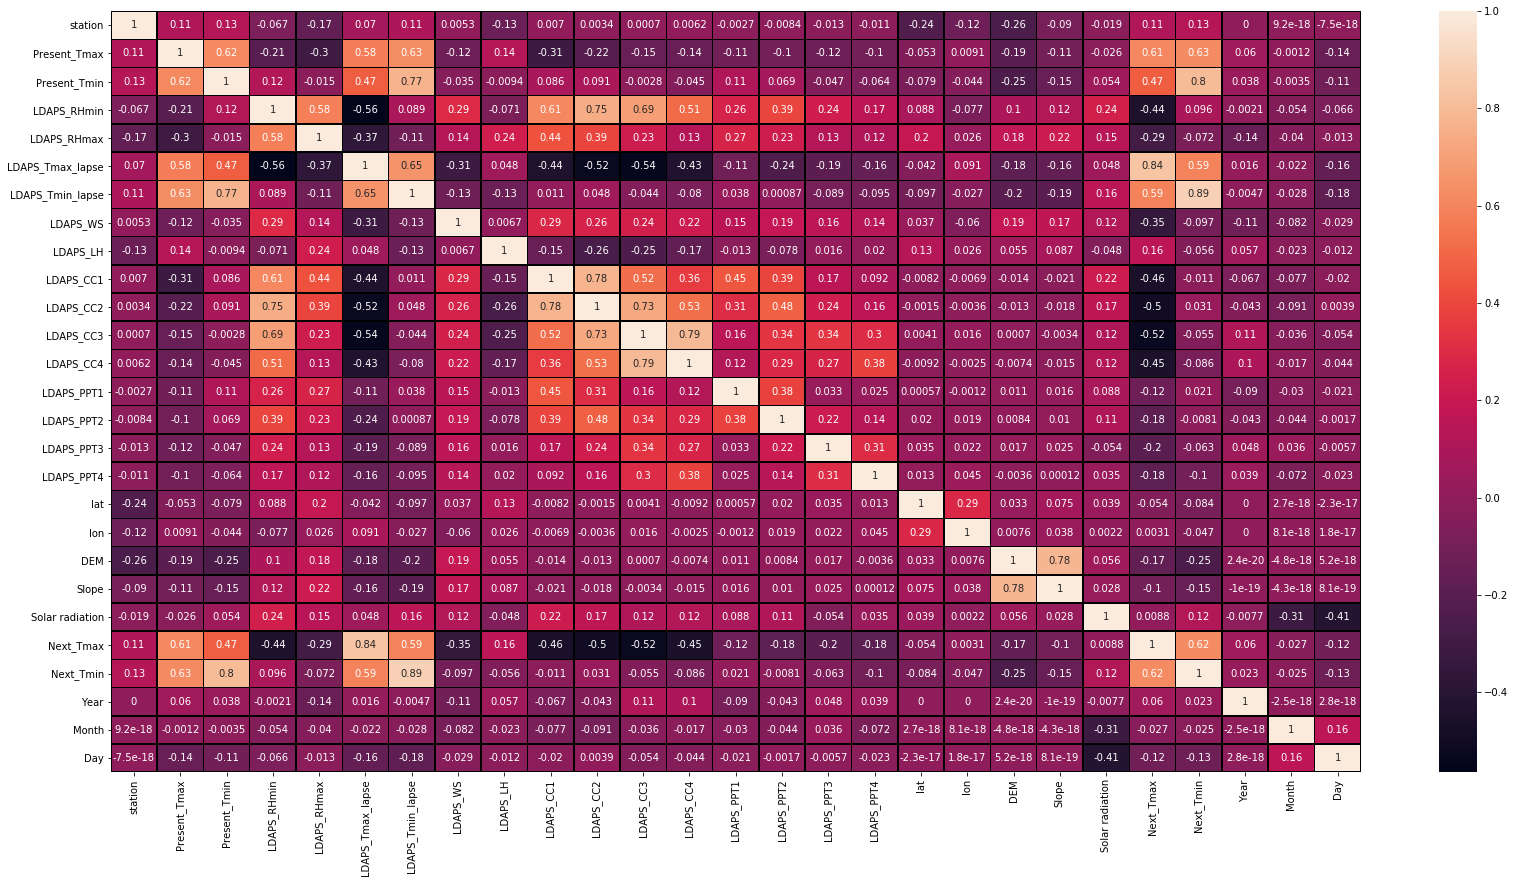

In [22]:
plt.figure(figsize=(28,14))
sns.heatmap(tds.corr(),annot=True,linewidth=0.5,linecolor='black')

Next_Tmax and Next_Tmin are quite positively correlated to each other.
LDAPS_Tmax_lapse with Next_Tmax and LDAPS_Tmin_lapse with Next_Tmin are highly correlated.
Present_Tmin and Next_Tmin are very much correlated.
Present_Tmax is correlated with both Next_Tmax and Next_Tmin.
LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 and LDAPS_CC4 all are very much correlated to each other.
LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 and LDAPS_CC4 are good correlated with LDAPS_RHmin.

### Handling null values.

In [23]:
# filling the null values.

ls=['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','Next_Tmax','Next_Tmin',
    'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
for i in ls:
    tds[i]=tds[i].fillna(tds[i].mean())

In [24]:
ls1=['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
for i in ls1:
    tds[i]=tds[i].fillna(tds[i].median())

In [25]:
tds.isnull().sum()

station             2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                2
Month               2
Day                 2
dtype: int64

In [26]:
# rest of them are not much so we can drop that.
tds=tds.dropna()

In [27]:
tds.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

Now all the null values are handled.

In [28]:
tds.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


### Checking for outliers

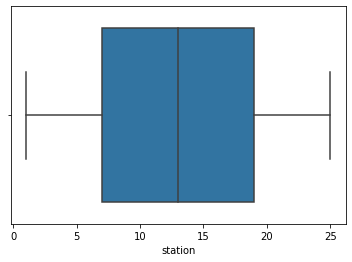

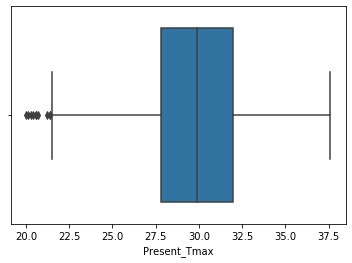

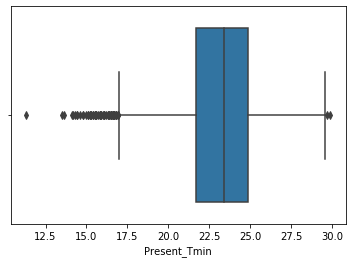

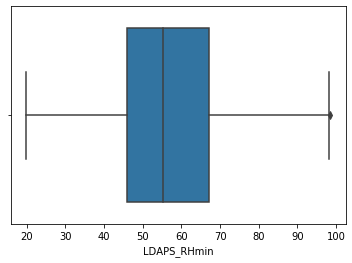

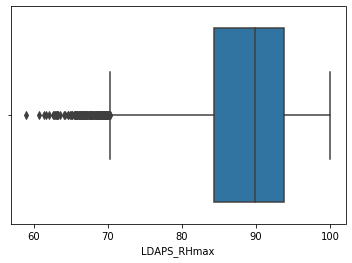

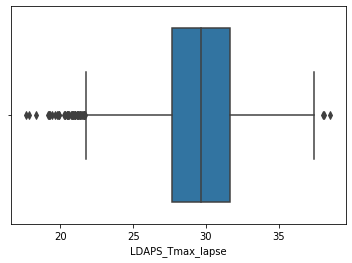

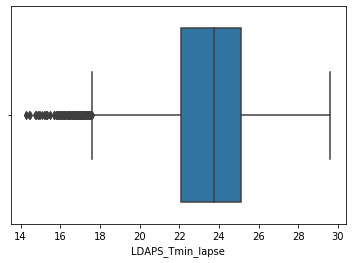

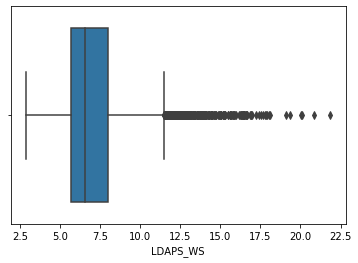

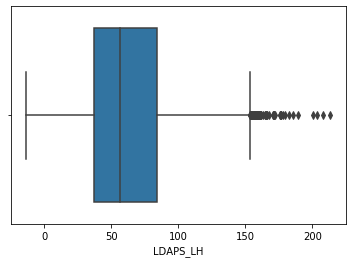

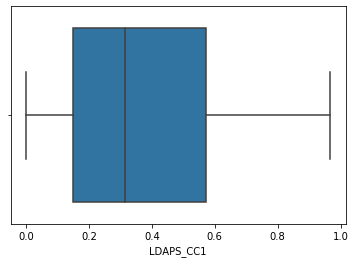

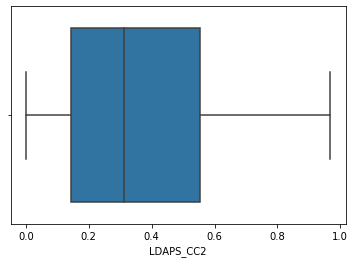

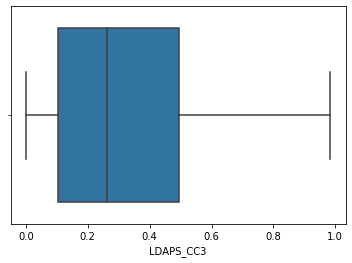

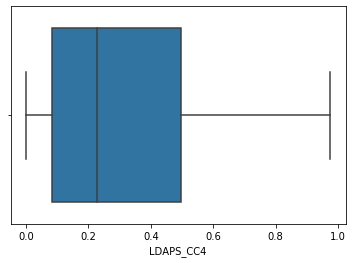

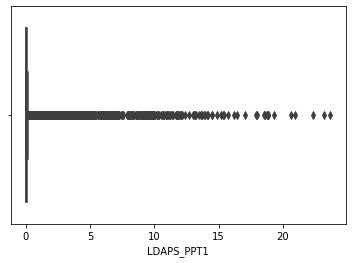

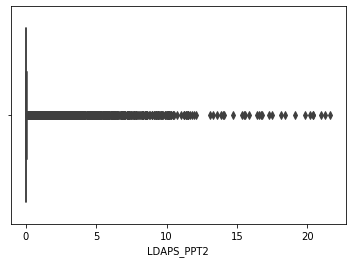

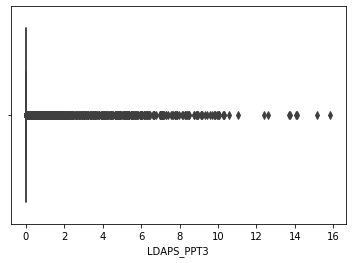

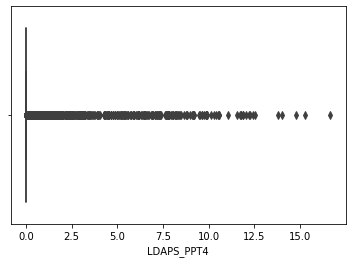

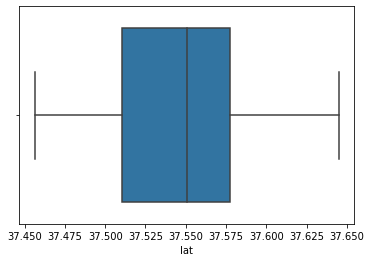

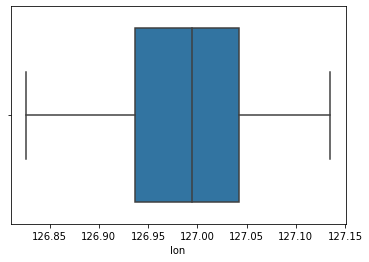

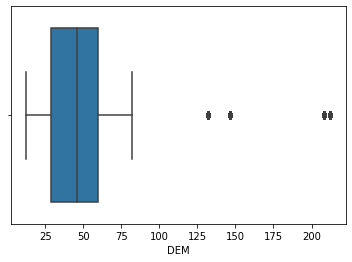

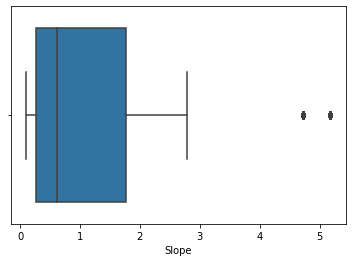

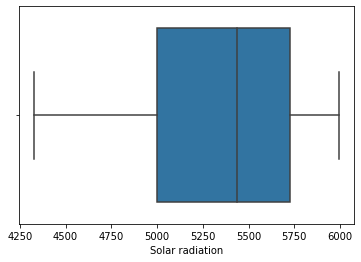

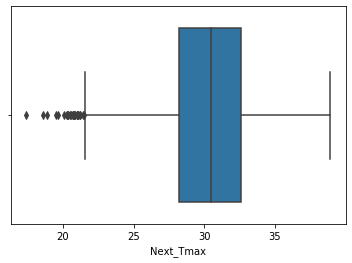

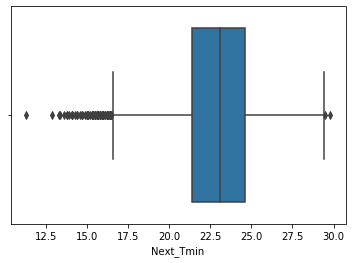

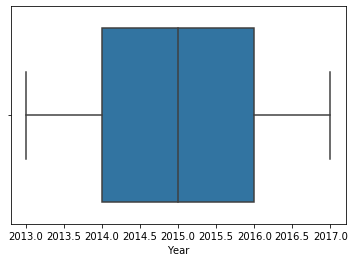

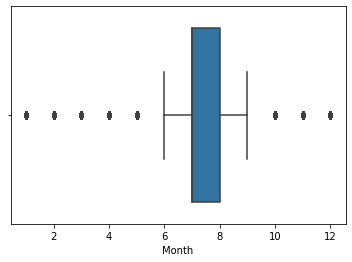

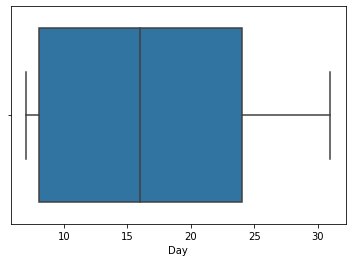

In [29]:
for i in tds.columns:
    sns.boxplot(tds[i])
    plt.show()

There are many columns which have outliers. we will try to handle it.

After removing the outliers about 11.12% of data will be lost so, we are not going to remove it.
I did every possible combination but I got maximum accuracy when I did not remove outlier and skewness.
Some columns are lost most of its data by removing the outliers such as LDAPS_PPT1, LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4.
In these columns data is itself in such a manner that they look like an outlier but not neccessary they are outliers.
So, finally we are not going to remove these things.

In [30]:
ds1=tds.copy()

### Spliting the data

In [31]:
x1=ds1.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
x1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,2017.0,8.0,30.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,2017.0,8.0,30.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,2017.0,8.0,30.0


In [32]:
y=ds1[['Next_Tmax','Next_Tmin']].copy()
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


### Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [34]:
x=sc.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,-1.664101,-0.361782,-0.761303,0.102641,0.381199,-0.525837,-0.217124,-0.125655,0.209167,-0.514235,-0.590994,-0.626786,-0.661914,-0.307046,-0.277548,-0.241743,-0.225419,1.189704,-0.005038,2.773649,1.115761,1.518401,-1.414214,-0.482815,1.653848
1,-1.525426,0.721742,-0.677906,-0.308235,0.309639,0.080886,0.223971,-0.645717,-0.313357,-0.546553,-0.404515,-0.635831,-0.674562,-0.307046,-0.277548,-0.241743,-0.225419,1.189704,0.511327,-0.315050,-0.542139,1.230307,-1.414214,-0.482815,1.653848
2,-1.386750,0.620161,0.030967,-0.553222,-0.617806,0.163054,0.451635,-0.439753,-1.249084,-0.608455,-0.382321,-0.456584,-0.617672,-0.307046,-0.277548,-0.241743,-0.225419,0.653264,0.838778,-0.526200,-0.723195,1.216887,-1.414214,-0.482815,1.653848
3,-1.248075,0.755602,0.072665,0.101551,1.131885,0.031005,-0.080153,-0.665024,0.098045,-0.581540,-0.504887,-0.628952,-0.648794,-0.307046,-0.277548,-0.241743,-0.225419,1.992377,0.385384,-0.297473,0.933099,1.201522,-1.414214,-0.482815,1.653848
4,-1.109400,0.552441,-0.552811,-0.040089,0.246758,-0.170723,-0.011375,-0.625821,1.358187,-0.830324,-0.411433,-0.557751,-0.507451,-0.307046,-0.277548,-0.241743,-0.225419,0.118811,1.808536,-0.494290,-0.548418,1.207554,-1.414214,-0.482815,1.653848


### Finding the Best Random State

In [35]:
maxacc=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.7931524876070923  at random state 82


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=118)

In [37]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6045, 25) (1705, 25) (6045, 2) (1705, 2)


### Models Training

In [38]:
lr=LinearRegression()               # These are the models, which works directly with multioutput regression.
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [39]:
model=[lr,rfr,dtr,knr]

for i in model:
    print('model:',i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    crs=cross_val_score(i,x,y,cv=5)
    print(crs.mean())
    print('\n')

model: LinearRegression()
0.7942549056306217
1.7262639224114273
0.7257925749467159


model: RandomForestRegressor()
0.9032473935630747
0.7821535404360065
0.7061639945281746


model: DecisionTreeRegressor()
0.793313206578266
1.6816261357300157
0.4393162122422668


model: KNeighborsRegressor()
0.8772769757729242
0.9943464857980502
0.5391597056235751




### Regularization

In [61]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [62]:
ls=Lasso()
rg=Ridge()
el=ElasticNet()

In [63]:
model=[ls,rg,el]

for i in model:
    print('model:',i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    crs=cross_val_score(i,x,y,cv=5)
    print(crs.mean())
    print('\n')

model: Lasso()
0.5901524168396856
3.375885457028563
0.5467605838724678


model: Ridge()
0.7942574960017144
1.7262473488611905
0.7258220635751316


model: ElasticNet()
0.6514873389743847
2.8717904312106954
0.5953963086740617




### Hyperparameter Tuning using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# linear regression

par={'fit_intercept':['True','False'],'normalize':['True','False']}
gcv=GridSearchCV(lr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False']})

In [66]:
gcv.best_params_

{'fit_intercept': 'True', 'normalize': 'True'}

In [67]:
lrg=LinearRegression(fit_intercept=True,normalize=True)
lrg.fit(x_train,y_train)
predlrg=lrg.predict(x_test)
print(r2_score(y_test,predlrg))
print(mean_squared_error(y_test,predlrg))

0.7942549056306217
1.7262639224114276


In [69]:
# random forest regressor

par={'n_estimators':(100,150,200,230,250),'max_depth':np.arange(1,10),'max_features':['auto','sqrt','log2']}

gcv=GridSearchCV(rfr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': (100, 150, 200, 230, 250)})

In [70]:
gcv.best_params_

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 250}

In [77]:
rf=RandomForestRegressor(n_estimators=250,max_depth=9,max_features='auto')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.8742109956290314
1.0196938747089548


In [78]:
# kneighbors regressor

par={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_jobs':[-1],'leaf_size':[8,9,10,11]}
gcv=GridSearchCV(knr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [8, 9, 10, 11], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [79]:
gcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 8,
 'n_jobs': -1,
 'n_neighbors': 7,
 'weights': 'distance'}

In [40]:
kn=KNeighborsRegressor(n_neighbors=7,weights='distance',algorithm='auto',n_jobs=-1,leaf_size=8)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print(r2_score(y_test,predkn))
print(mean_squared_error(y_test,predkn))

0.8842308483082256
0.9413372904275841


In [81]:
# lasso
par={'alpha':[0.1,1.0,0.001,0.0001]}
gcv=GridSearchCV(ls,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1.0, 0.001, 0.0001]})

In [82]:
gcv.best_params_

{'alpha': 0.001}

In [83]:
lsr=Lasso(alpha=0.001)
lsr.fit(x_train,y_train)
predlsr=lsr.predict(x_test)
print(r2_score(y_test,predlsr))
print(mean_squared_error(y_test,predlsr))

0.7942652836987194
1.7262123408845893


In [84]:
# ridge
par={'alpha':[0.1,1.0,0.001,0.0001]}
gcv=GridSearchCV(rg,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 0.001, 0.0001]})

In [85]:
gcv.best_params_

{'alpha': 1.0}

In [86]:
rdg=Ridge(alpha=1.0)
rdg.fit(x_train,y_train)
predrdg=rdg.predict(x_test)
print(r2_score(y_test,predrdg))
print(mean_squared_error(y_test,predrdg))

0.7942574960017144
1.7262473488611905


In [87]:
# elasticnet
par={'alpha':[0.1,1.0,0.001,0.0001]}
gcv=GridSearchCV(el,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 0.001, 0.0001]})

In [88]:
gcv.best_params_

{'alpha': 0.001}

In [89]:
eln=ElasticNet(alpha=0.001)
eln.fit(x_train,y_train)
predeln=eln.predict(x_test)
print(r2_score(y_test,predeln))
print(mean_squared_error(y_test,predeln))

0.7942694767309608
1.7261789038376643


From all above model observation we can see that KNeighbors Regressor have highest accuracy among all other models and its MSE is also quite low.
So, it is our final model.

### Saving our model

In [1]:
import joblib

In [41]:
joblib.dump(kn,'Temp_Forecast_knr.obj')

['Temp_Forecast_knr.obj']

### Loading model

In [42]:
temp=joblib.load('Temp_Forecast_knr.obj')
temp

KNeighborsRegressor(leaf_size=8, n_jobs=-1, n_neighbors=7, weights='distance')

In [48]:
score=temp.score(x_test,y_test)
score

0.8842308483082256

In [45]:
# making prediction.
result=temp.predict(x_test)

In [46]:
result

array([[30.27844659, 25.23512164],
       [30.7876089 , 23.60188072],
       [32.73532744, 26.01926282],
       ...,
       [33.62765905, 23.68858791],
       [33.1537139 , 23.34902721],
       [30.96289144, 24.94948921]])